In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\manav\OneDrive\Desktop\ev carging stationns\Data\processed\merged_data.csv")

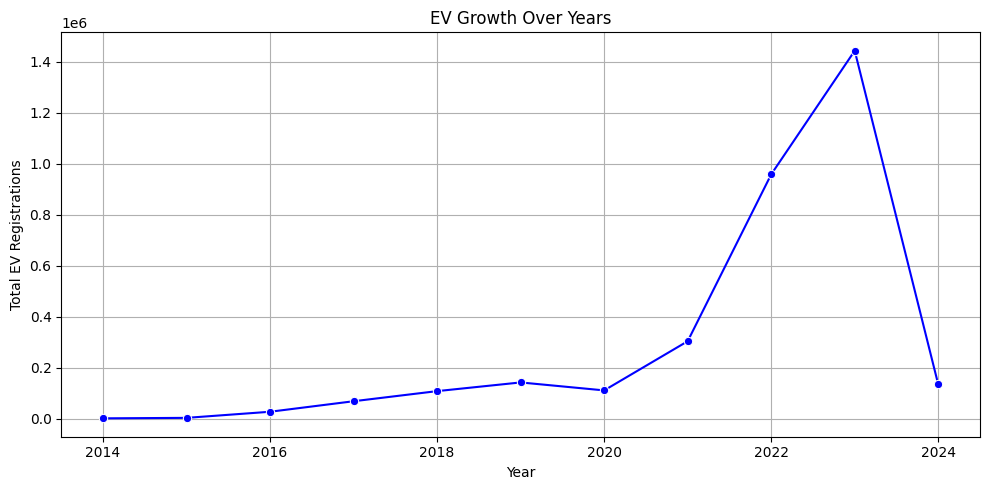

In [15]:
ev_by_year = df.groupby('year')['ev_count'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=ev_by_year.index, y=ev_by_year.values, marker='o', color='blue')
plt.title('EV Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Total EV Registrations')
plt.grid(True)
plt.tight_layout()
plt.show()

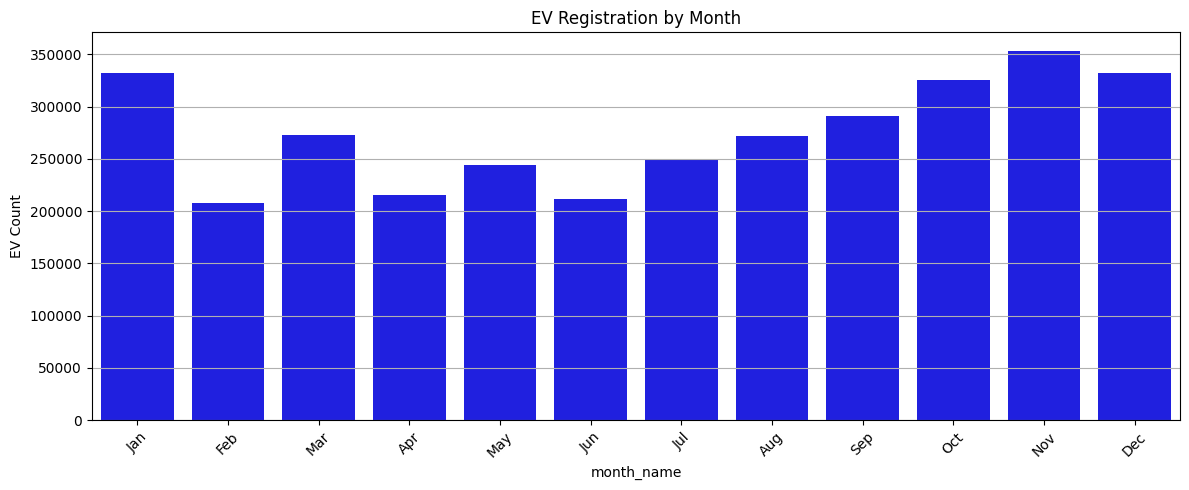

In [33]:
ev_by_month = df.groupby('month_name')['ev_count'].sum().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.figure(figsize=(12,5))
sns.barplot(x=ev_by_month.index, y=ev_by_month.values, color='blue')
plt.title('EV Registration by Month')
plt.ylabel('EV Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


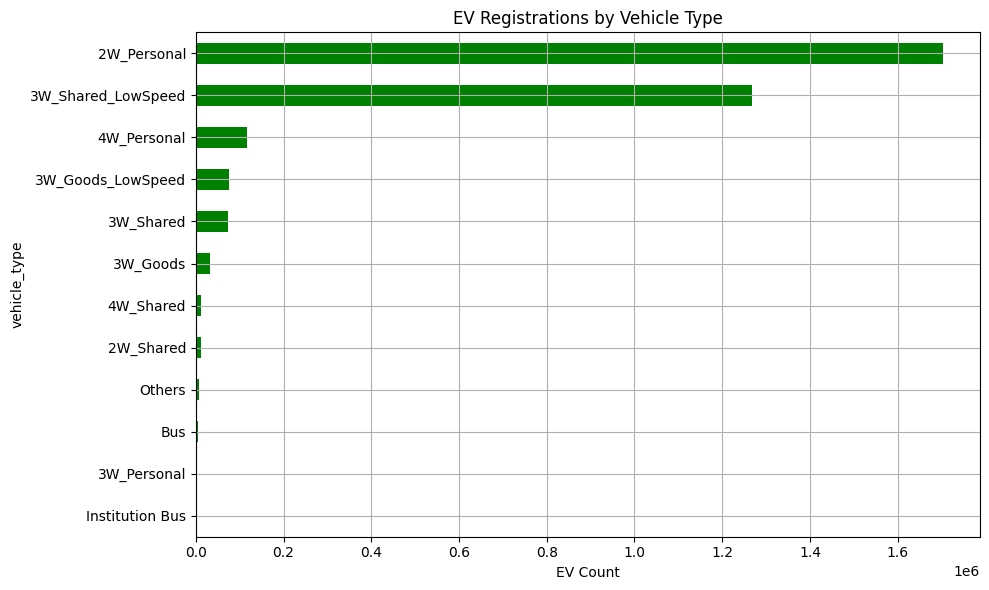

In [34]:
vehicle_type_dist = df.groupby('vehicle_type')['ev_count'].sum().sort_values()

plt.figure(figsize=(10,6))
vehicle_type_dist.plot(kind='barh', color='green')
plt.title('EV Registrations by Vehicle Type')
plt.xlabel('EV Count')
plt.grid(True)
plt.tight_layout()
plt.show()


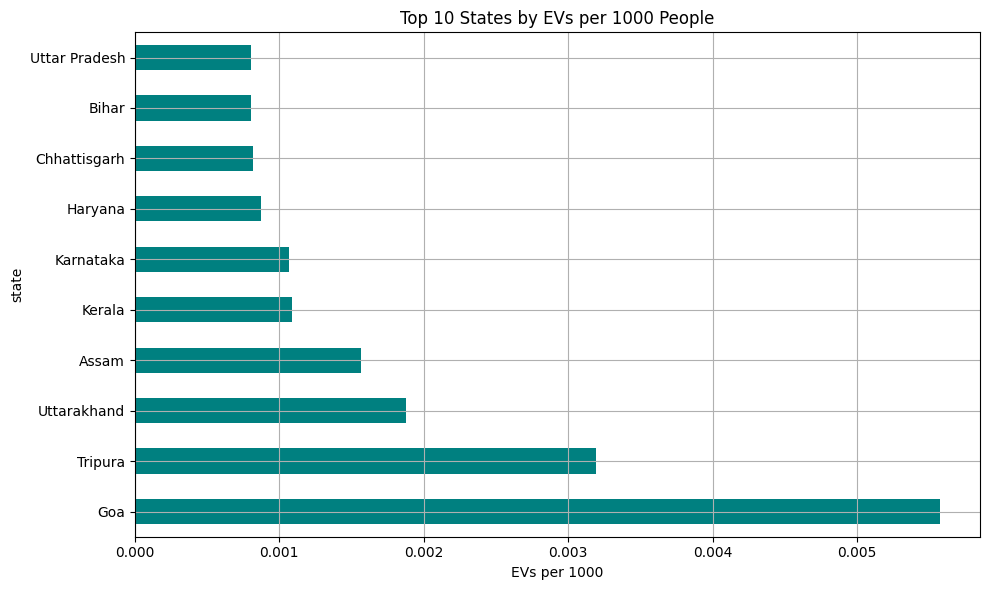

In [35]:
ev_per_state = df.groupby('state')['ev_per_1000'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
ev_per_state.plot(kind='barh', color='teal')
plt.title('Top 10 States by EVs per 1000 People')
plt.xlabel('EVs per 1000')
plt.grid(True)
plt.tight_layout()
plt.show()


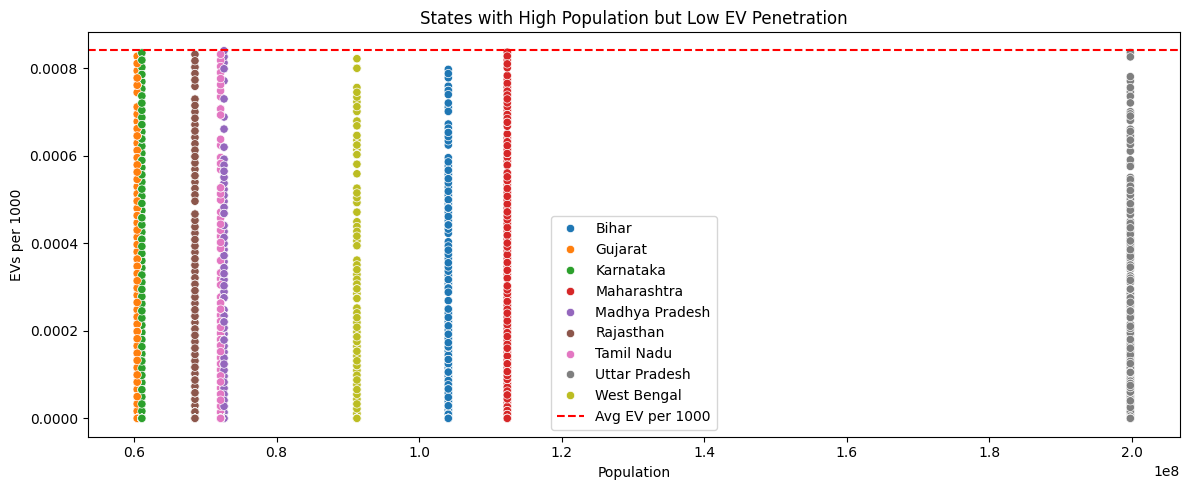

In [36]:
# Average EVs per 1000 people
avg_ev_per_1000 = df['ev_per_1000'].mean()

# Filter states with high population and below-average EVs per 1000
gap_states = df[(df['population'] > df['population'].mean()) & 
                (df['ev_per_1000'] < avg_ev_per_1000)]

plt.figure(figsize=(12,5))
sns.scatterplot(data=gap_states, x='population', y='ev_per_1000', hue='state')
plt.title('States with High Population but Low EV Penetration')
plt.xlabel('Population')
plt.ylabel('EVs per 1000')
plt.axhline(avg_ev_per_1000, color='red', linestyle='--', label='Avg EV per 1000')
plt.legend()
plt.tight_layout()
plt.show()


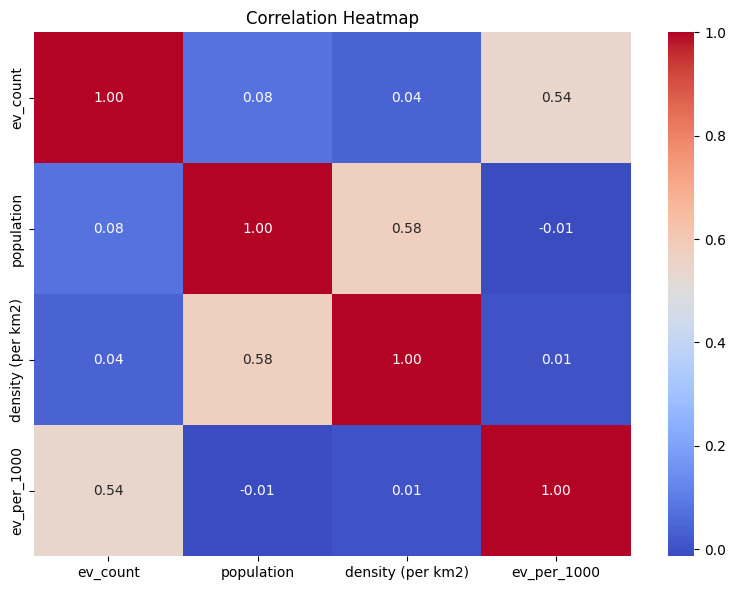

In [37]:
corr_cols = ['ev_count', 'population', 'density (per km2)', 'ev_per_1000']
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
